# 1.0 - Introdução

Este estudo tem como objetivo desenvolver e avaliar modelos preditivos para análise de comportamento de compra dos clientes, com foco na classificação binária de aquisição ou não aquisição de um produto ou serviço. Para isso, utilizamos um conjunto de dados disponibilizado na plataforma Kaggle, conhecido por fornecer bases reais e sintéticas de alta qualidade para desafios em ciência de dados.

O arquivo utilizado contém informações processadas referentes ao perfil e histórico dos clientes, possibilitando a construção de modelos baseados em aprendizado supervisionado, como Árvore de Decisão e **Random Forest**. O processo inclui etapas de pré-processamento, divisão estratificada em conjuntos de treino e teste, ajuste de hiperparâmetros via validação cruzada, além de análises robustas de avaliação e otimização de threshold para melhor balancear a sensibilidade e especificidade do modelo.

Adicionalmente, aplicamos técnicas de bootstrap para mensurar a estabilidade e a variabilidade das métricas, garantindo a robustez das conclusões. Este trabalho fornece um framework técnico e metodológico para a implementação de modelos preditivos em cenários comerciais, auxiliando na tomada de decisão para estratégias de marketing e retenção de clientes.

## 1.1 - Importação das Bibliotecas Necessárias
**Descriçã**:

- Importação das bibliotecas padrão para manipulação e análise de dados (pandas, numpy).

- Importação de bibliotecas para visualização (seaborn, matplotlib.pyplot), essenciais para análise exploratória e apresentação gráfica.

- Importação de modelo de classificação: DecisionTreeClassifier do sklearn, amplamente utilizados em problemas de classificação binária e multiclasse.

- Importação das funções para validação, seleção de hiperparâmetros e divisão de dados (GridSearchCV, train_test_split), fundamentais para garantir robustez na modelagem.

- Importação das métricas para avaliação de desempenho dos modelos, incluindo métricas para classificação e regressão (embora aqui o foco seja classificação), além de funções para matriz de confusão, que auxiliam na análise detalhada dos erros.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    accuracy_score,
    classification_report,
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, accuracy_score
)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1.2 - Importação e Carregamento dos Dados
**Descrição**:

- Carregamento do conjunto de dados processado a partir do Google Drive, facilitando a integração com o ambiente Google Colab.

- Arquivo costumer_processed.csv contém dados pré-processados referentes ao comportamento de compra dos clientes, prontos para análises e modelagem.

In [ ]:
df = pd.read_csv("/home/felipe/Classification_model/data/costumer_processed.csv")

## 1.3 - Separação das Variáveis Independentes (Features) e Variável Alvo (Target)

**Descrição**:

- X representa o conjunto de variáveis explicativas (features) que o modelo utilizará para aprender padrões relacionados ao comportamento de compra.

- y é a variável alvo, binária, indicando se o cliente realizou a compra (Purchased), que será usada para treinar e avaliar o modelo.

- A separação clara entre X e y é fundamental para garantir que o modelo não tenha acesso direto à resposta durante o treino.

- A função head() permite uma inspeção rápida dos dados para validar se a separação foi realizada corretamente e para entender a estrutura das variáveis.

In [ ]:
X = df.drop("Purchased", axis = 1)

y = df["Purchased"]

In [ ]:
X.head()

,Unnamed: 0,Age,Income,Score,Income_per_Age,Age_x_Score,Marital_Status_Married,Marital_Status_Single,City_Houston,City_Los Angeles,City_New York,City_Phoenix
0,0,56,24000,0.479897,428.571429,26.874237,False,False,True,False,False,False
1,1,46,90588,0.685968,1969.304348,31.554516,False,True,False,False,False,False
2,2,32,113610,0.017380,3550.312500,0.556153,False,False,True,False,False,False
3,3,60,117856,0.323131,1964.266667,19.387839,True,False,False,False,True,False
4,4,25,58304,0.973098,2332.160000,24.327444,False,True,True,False,False,False


In [ ]:
y.head()

,Purchased
0,0
1,1
2,0
3,0
4,0


# 2 - Divisão do Conjunto de Dados em Treino e Teste

**Descrição**:

- A função train_test_split divide o conjunto de dados em duas partes:
  - Conjunto de treino (X_train, y_train): usado para treinar o modelo.
  - Conjunto de teste (X_test, y_test): usado para avaliar a performance do modelo em dados não vistos.

- O parâmetro test_size=0.2 indica que 20% dos dados são reservados para avaliação, enquanto 80% são usados para treinamento.

- O parâmetro random_state=42 fixa a aleatoriedade da divisão para que os resultados possam ser reproduzidos em execuções futuras.

- Essa separação é fundamental para evitar overfitting e garantir uma avaliação justa do modelo em dados novos.

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

## 2.1 - Otimização de Hiperparâmetros da Árvore de Decisão com Grid Search

**Descrição**:

- Grid Search permite testar sistematicamente todas as combinações possíveis dos hiperparâmetros especificados, garantindo a escolha da melhor configuração para o modelo.

- A validação cruzada (cv=5) divide os dados em 5 partes para avaliar a performance de forma mais robusta, minimizando o risco de overfitting.

- A métrica escolhida para otimização é o F1-score, adequada para problemas com classes desbalanceadas, equilibrando precisão e recall.

- O uso de n_jobs=-1 maximiza o uso da CPU para acelerar o processo.

- Após a busca, os melhores hiperparâmetros são exibidos para serem usados na criação do modelo final.

In [ ]:
param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_leaf_nodes": [None, 10, 20, 50]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


## 2.2 - Definição do Modelo Árvore de Decisão com Hiperparâmetros Otimizados e Balanceamento

**Descrição**:

- O modelo de Árvore de Decisão é configurado para controlar a complexidade e evitar overfitting usando parâmetros como max_depth e min_samples_leaf.

- O parâmetro class_weight="balanced" é fundamental para problemas com classes desbalanceadas, pois ajusta os pesos inversamente à frequência das classes, ajudando o modelo a focar mais na classe minoritária.

- Esses parâmetros podem ter sido definidos a partir da etapa de otimização (Grid Search) ou por conhecimento prévio do problema.

- Essa instância será usada para treinar o modelo no conjunto de treino e posterior avaliação.

In [ ]:
modelo_arvore = DecisionTreeClassifier(
    max_depth = 5,
    max_leaf_nodes = None,
    min_samples_leaf = 10,
    min_samples_split = 2,
    class_weight="balanced"
)

## 2.3 - Treinamento do Modelo Árvore de Decisão

**Descrição**:

- O método fit realiza o treinamento do modelo utilizando os dados de entrada X_train (features) e os rótulos y_train (classe alvo).

- Durante o treinamento, o algoritmo constrói a árvore de decisão encontrando as melhores divisões que separam as classes, respeitando os hiperparâmetros definidos (ex.: profundidade, número mínimo de amostras por folha).

- O balanceamento de classes (class_weight="balanced") influencia o processo, dando maior importância à classe minoritária para melhorar a capacidade preditiva em problemas desbalanceados.

- O modelo treinado estará pronto para realizar previsões e avaliações nos dados de teste ou novos dados.

In [ ]:
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10)

# 3 - Avaliação do Modelo Árvore de Decisão no Conjunto de Teste

**Descrição**:

- O método predict gera as predições das classes com base nas features do conjunto de teste (X_test).

- O relatório de classificação (classification_report) apresenta métricas fundamentais para avaliação da performance do modelo, incluindo:
  - Precisão (precision): proporção de predições positivas corretas.
  - Recall (sensibilidade): proporção de verdadeiros positivos detectados.
  - F1-score: média harmônica entre precisão e recall, útil em datasets desbalanceados.
  - Valores de ROC AUC próximos a 1 indicam alta capacidade discriminativa; valores próximos a 0.5 indicam desempenho similar ao acaso.

- Support: número de amostras reais em cada classe.

- Essas métricas permitem analisar a capacidade do modelo em classificar corretamente as classes e identificar possíveis desequilíbrios na performance.

In [ ]:
y_arvore_pred = modelo_arvore.predict(X_test)
print(classification_report(y_test, y_arvore_pred))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62        57
           1       0.39      0.26      0.31        43

    accuracy                           0.51       100
   macro avg       0.47      0.48      0.47       100
weighted avg       0.49      0.51      0.49       100



In [ ]:
y_arvore_proba = modelo_arvore.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_arvore_proba)
print("ROC AUC:", roc_auc.round(2))

ROC AUC: 0.52


# 4 - Visualização da Matriz de Confusão para o Modelo Árvore de Decisão

**Descrição**:

- A matriz de confusão mostra a distribuição das predições do modelo em relação aos valores reais, permitindo analisar:

  - Verdadeiros Negativos (clientes que não compraram e foram corretamente classificados).
  - Verdadeiros Positivos (clientes que compraram e foram corretamente classificados).
  - Falsos Negativos (clientes que compraram mas foram classificados como não compradores).
  - Falsos Positivos (clientes que não compraram mas foram classificados como compradores).

- A visualização da matriz ajuda a entender erros específicos do modelo e a eficácia na classificação das classes.

- Essencial para problemas de classificação binária, especialmente quando as consequências de falsos positivos e falsos negativos têm impactos distintos.

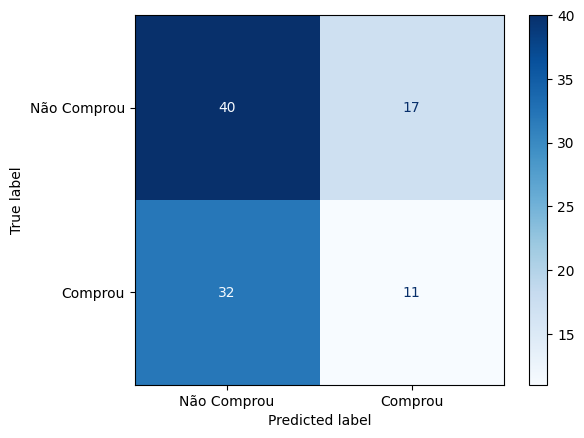

In [ ]:
matrix_arvore = confusion_matrix(y_test, y_arvore_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=matrix_arvore,
    display_labels=["Não Comprou", "Comprou"]
)

disp.plot(cmap="Blues")
plt.show()

# 5 - Avaliação da Robustez do Modelo via Bootstrap com Threshold Customizado

**Descrição**:

- Bootstrap: técnica de amostragem com reposição para gerar múltiplos subconjuntos dos dados, permitindo estimar a variabilidade e estabilidade do modelo.

- Para cada amostra bootstrap:

  - É feita uma divisão interna em treino/teste para simular diferentes cenários de dados.
  - O modelo é treinado e avaliado com um threshold de 0.3, ajustando o critério de decisão para a classe positiva.

- Métricas capturadas incluem precisão, recall, F1-score para a classe “1” (positiva) e a métrica ROC AUC, importante para análise probabilística.

- Esse procedimento ajuda a identificar a robustez e consistência das métricas, fundamentais para a confiança na aplicação prática do modelo.



In [ ]:
n_bootstrap = 100
threshold = 0.3
metrics = []

for i in range(n_bootstrap):
    # Amostragem com reposição
    indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]

    # Divisão treino/teste dentro do bootstrap
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.3, stratify=y_sample, random_state=i
    )

    # Treinamento do modelo
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Previsão com probabilidades e threshold
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    # Métricas
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)

    metrics.append({
        "precision_1": report['1']['precision'],
        "recall_1": report['1']['recall'],
        "f1_1": report['1']['f1-score'],
        "roc_auc": auc
    })

## 5.1 - Análise Estatística dos Resultados do Bootstrap

**Descrição**:

- A transformação dos resultados do bootstrap em um DataFrame permite análise agregada e comparativa das métricas.
- O método describe() apresenta medidas estatísticas importantes como:

  - Média, mediana, desvio padrão — para entender a tendência central e a variabilidade.
  - Quartis e valores mínimos/máximos — para avaliar a dispersão e possíveis outliers.

- A transposição (.T) melhora a visualização, mostrando as métricas como linhas e os estatísticos como colunas.

- Essa análise permite verificar a estabilidade e confiabilidade do modelo em diferentes amostras geradas por bootstrap.

In [ ]:
results = pd.DataFrame(metrics)
results.describe().T

,count,mean,std,min,25%,50%,75%,max
precision_1,100.0,0.774768,0.036740,0.698630,0.749342,0.776393,0.798315,0.871795
recall_1,100.0,0.779057,0.055870,0.605263,0.740947,0.778499,0.817624,0.896552
f1_1,100.0,0.775853,0.037685,0.671533,0.752604,0.771163,0.804668,0.866667
roc_auc,100.0,0.758038,0.034582,0.690476,0.733732,0.759315,0.783919,0.846728


## 5.2 - Visualização da Matriz de Confusão para a Última Amostra Avaliada

**Descrição**:

- Essa visualização apresenta a matriz de confusão referente à última iteração do loop bootstrap, facilitando a interpretação dos erros e acertos nessa amostra específica.

- Permite avaliar:

  - Verdadeiros positivos e negativos.
  - Falsos positivos e falsos negativos.

- Importante para entender a performance local do modelo em uma amostra representativa dos dados.

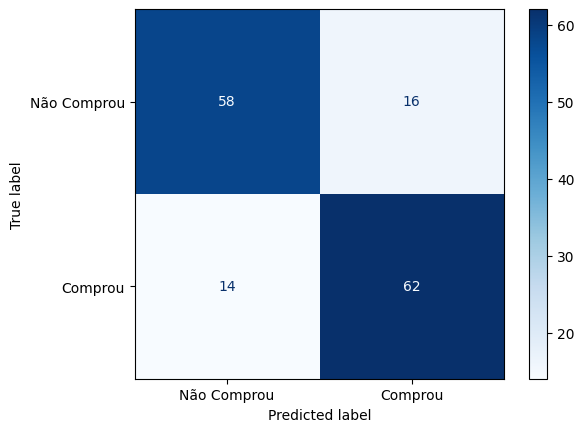

In [ ]:
modelo_cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=modelo_cm,
    display_labels=["Não Comprou", "Comprou"]
)

disp.plot(cmap="Blues")
plt.show()